work_year
The year the salary was paid

experience_level
The experience level in the job during the year with the following possible values

EN : Entry-level / Junior
MI : Mid-level / Intermediate
SE : Senior-level / Expert
EX : Executive-level / Director
employment_type
The type of employement for the role

PT : Part-time
FT : Full-time
CT : Contract
FL : Freelance
job_title
The role worked in during the year

salary
The total gross salary amount paid

salary_currency
The currency of the salary paid

employee_residence
Employee's primary country of residence in during the work year as an ISO 3166 country code

remote_ratio
The overall amount of work done remotely, possible values are as follows

0 : No remote work (less than 20%)
50 : Partially remote
100 : Fully remote (more than 80%)
company_location
The country of the employer's main office or contracting branch as an ISO 3166 country code

company_size
The average number of people that worked for the company during the year

S : less than 50 employees (small)
M : 50 to 250 employees (medium)
L : more than 250 employees (large).

In [781]:
import pandas as pd
import matplotlib.pyplot as plt
import os
df = pd.read_csv("salaries.csv")

Pertama, kita akan melakukan data cleansing. Kita akan memeriksa berapa data yang kosong.

In [782]:
emptydata = df.isna().sum()
print(emptydata.to_string())
print("Persentase data yang kosong adalah", emptydata.sum()/(len(df.axes[0]) + len(df.axes[1])) * 100, "%")

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
Persentase data yang kosong adalah 0.0 %


Kita lihat tidak ada data yang kosong.

In [783]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8801,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8802,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Sekarang kita cari panjang, dimensi, dan ukuran file data.

In [784]:
print("Panjang data adalah", len(df))
print("Dimensi data adalah {}".format(df.shape))
print("Ukuran file data adalah ", os.stat("salaries.csv").st_size, "Byte", "atau", os.stat("salaries.csv").st_size / 1024, "KiloByte")

Panjang data adalah 8805
Dimensi data adalah (8805, 11)
Ukuran file data adalah  505564 Byte atau 493.71484375 KiloByte


List setiap tahun kerja ("work_year")

In [785]:
print(df["work_year"].sort_values().unique())

[2020 2021 2022 2023]


List semua "experience_level"

In [786]:
print(df["experience_level"].unique())

['EX' 'MI' 'SE' 'EN']


List semua "employment_type"

In [787]:
print(df["employment_type"].unique())

['FT' 'FL' 'CT' 'PT']


List setiap pekerjaan ("job_title")

In [788]:
print(df["job_title"].sort_values().unique())

['AI Architect' 'AI Developer' 'AI Engineer' 'AI Programmer'
 'AI Research Engineer' 'AI Scientist' 'AWS Data Architect'
 'Analytics Engineer' 'Analytics Engineering Manager'
 'Applied Data Scientist' 'Applied Machine Learning Engineer'
 'Applied Machine Learning Scientist' 'Applied Scientist'
 'Autonomous Vehicle Technician' 'Azure Data Engineer' 'BI Analyst'
 'BI Data Analyst' 'BI Data Engineer' 'BI Developer' 'Big Data Architect'
 'Big Data Engineer' 'Business Data Analyst'
 'Business Intelligence Analyst' 'Business Intelligence Consultant'
 'Business Intelligence Data Analyst' 'Business Intelligence Developer'
 'Business Intelligence Engineer' 'Business Intelligence Manager'
 'Business Intelligence Specialist' 'Cloud Data Architect'
 'Cloud Data Engineer' 'Cloud Database Engineer' 'Compliance Data Analyst'
 'Computer Vision Engineer' 'Computer Vision Software Engineer'
 'Consultant Data Engineer' 'Data Analyst' 'Data Analytics Consultant'
 'Data Analytics Engineer' 'Data Analytics 

Agar lebih mudah dalam visualisasi data, kita dapat mengelompokkan pekerjaan ("job_title") menjadi kelompok-kelompok ("job_group").

In [789]:
ai_jobs = ['AI Architect', 'AI Developer', 'AI Engineer', 'AI Programmer', 'AI Research Engineer', 'AI Scientist']

data_engineering_jobs = [
    'AWS Data Architect', 'Azure Data Engineer', 'BI Data Engineer', 'Data Engineer',
    'Data Infrastructure Engineer', 'Data Integration Engineer', 'Data Integration Specialist',
    'Data Operations Analyst', 'Data Operations Engineer', 'Data Operations Manager',
    'Data Operations Specialist', 'ETL Developer', 'ETL Engineer', 'Cloud Data Architect',
    'Cloud Data Engineer', 'Cloud Database Engineer', 'Consultant Data Engineer', 'Software Data Engineer'
]

bi_analytics_jobs = [
    'BI Analyst', 'BI Data Analyst', 'BI Data Engineer', 'BI Developer',
    'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst',
    'Business Intelligence Analyst', 'Business Intelligence Consultant',
    'Business Intelligence Data Analyst', 'Business Intelligence Developer',
    'Business Intelligence Engineer', 'Business Intelligence Manager',
    'Business Intelligence Specialist', 'Power BI Developer'
]

analytics_jobs = [
    'Analytics Engineer', 'Analytics Engineering Manager', 'Data Analytics Consultant',
    'Data Analytics Engineer', 'Data Analytics Lead', 'Data Analytics Manager',
    'Data Analytics Specialist', 'Insight Analyst', 'Marketing Data Analyst',
    'Marketing Data Engineer', 'Sales Data Analyst'
]

ml_jobs = [
    'Applied Data Scientist', 'Applied Machine Learning Engineer', 'Applied Machine Learning Scientist',
    'Applied Scientist', 'Machine Learning Developer', 'Machine Learning Engineer',
    'Machine Learning Manager', 'Machine Learning Operations Engineer', 'ML Engineer',
    'MLOps Engineer', 'Lead Machine Learning Engineer', 'Machine Learning Research Engineer',
    'Machine Learning Researcher', 'Machine Learning Scientist', 'Machine Learning Software Engineer',
    'Machine Learning Specialist', 'Deep Learning Engineer', 'Deep Learning Researcher',
    'Director of Data Science', 'Head of Machine Learning', 'Lead Data Scientist',
    'Principal Machine Learning Engineer', 'Staff Machine Learning Engineer'
]

data_management_jobs = [
    'Data Lead', 'Data Management Specialist', 'Data Manager', 'Manager Data Management',
    'Head of Data', 'Head of Data Science', 'Managing Director Data Science'
]

data_science_jobs = [
    'Data Science Consultant', 'Data Science Director', 'Data Science Engineer',
    'Data Science Lead', 'Data Science Manager', 'Data Science Practitioner',
    'Data Science Tech Lead', 'Data Scientist', 'Data Scientist Lead',
    'Research Analyst', 'Research Engineer', 'Research Scientist', 'Decision Scientist'
]

data_quality_jobs = [
    'Data Quality Analyst', 'Data Quality Engineer'
]

data_visualization_jobs = [
    'Data Visualization Analyst', 'Data Visualization Engineer', 'Data Visualization Specialist'
]

others = [
    'Autonomous Vehicle Technician', 'Compliance Data Analyst', 'Finance Data Analyst', 'Financial Data Analyst',
    'NLP Engineer', 'Principal Data Analyst', 'Principal Data Architect', 'Principal Data Engineer',
    'Principal Data Scientist', 'Product Data Analyst', 'Research Analyst', 'Research Engineer',
    'Research Scientist', 'Sales Data Analyst', 'Software Data Engineer', 'Staff Data Analyst',
    'Staff Data Scientist'
]
df["job_group"] = "Others"
df["job_group"].loc[df["job_title"].isin(ai_jobs)] = "AI Jobs"
df["job_group"].loc[df["job_title"].isin(data_engineering_jobs)] = "Data Engineering Jobs"
df["job_group"].loc[df["job_title"].isin(bi_analytics_jobs)] = "BI and Analytics Jobs"
df["job_group"].loc[df["job_title"].isin(analytics_jobs)] = "Analytics Jobs"
df["job_group"].loc[df["job_title"].isin(ml_jobs)] = "Machine Learning Jobs"
df["job_group"].loc[df["job_title"].isin(data_management_jobs)] = "Data Management Jobs"
df["job_group"].loc[df["job_title"].isin(data_science_jobs)] = "Data Science Jobs"
df["job_group"].loc[df["job_title"].isin(data_quality_jobs)] = "Data Quality Jobs"
df["job_group"].loc[df["job_title"].isin(others)] = "Others"

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13480\3722255244.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job_group"].loc[df["job_title"].isin(ai_jobs)] = "AI Jobs"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13480\3722255244.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job_group"].loc[df["job_title"].isin(data_engineering_jobs)] = "Data Engineering Jobs"
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13480\3722255244.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

List mata uang yang digunakan untuk membayar gaji ("salary_currency")

In [790]:
print(df["salary_currency"].unique())

['USD' 'GBP' 'EUR' 'AUD' 'INR' 'CAD' 'PLN' 'BRL' 'PHP' 'TRY' 'CHF' 'NOK'
 'JPY' 'ZAR' 'HKD' 'SGD' 'ILS' 'THB' 'HUF' 'DKK' 'MXN' 'CLP']


List tempat tinggal pekerja ("address")

In [791]:
print(df["employee_residence"].unique())

['US' 'GB' 'CA' 'IN' 'UA' 'LT' 'PT' 'NL' 'ES' 'AU' 'FR' 'UG' 'CO' 'IT'
 'SI' 'RO' 'GR' 'LV' 'MU' 'DE' 'PL' 'AM' 'HR' 'TH' 'KR' 'EE' 'TR' 'PH'
 'BR' 'QA' 'RU' 'KE' 'TN' 'GH' 'BE' 'CH' 'AD' 'EC' 'PE' 'MX' 'MD' 'NG'
 'SA' 'NO' 'AR' 'EG' 'UZ' 'GE' 'JP' 'ZA' 'HK' 'CF' 'FI' 'IE' 'IL' 'AT'
 'SG' 'SE' 'KW' 'CY' 'BA' 'PK' 'IR' 'AS' 'HU' 'CN' 'CR' 'CL' 'PR' 'DK'
 'BO' 'DO' 'ID' 'AE' 'MY' 'HN' 'CZ' 'DZ' 'VN' 'IQ' 'BG' 'JE' 'RS' 'NZ'
 'LU' 'MT']


List "remote ratio"

In [792]:
print(df["remote_ratio"].sort_values().unique())

[  0  50 100]


List lokasi perusahaan ("company_location")

In [793]:
print(df["company_location"].unique())

['US' 'GB' 'CA' 'IN' 'NL' 'LT' 'PT' 'GI' 'AU' 'FR' 'CO' 'UA' 'SI' 'RO'
 'ES' 'GR' 'LV' 'MU' 'DE' 'PL' 'RU' 'IT' 'KR' 'EE' 'CZ' 'CH' 'BR' 'QA'
 'KE' 'DK' 'GH' 'SE' 'PH' 'TR' 'AD' 'EC' 'MX' 'IL' 'NG' 'SA' 'NO' 'AR'
 'JP' 'ZA' 'HK' 'CF' 'FI' 'IE' 'SG' 'TH' 'HR' 'AM' 'BA' 'PK' 'IR' 'BS'
 'HU' 'AT' 'PR' 'AS' 'BE' 'ID' 'EG' 'AE' 'MY' 'HN' 'DZ' 'IQ' 'CN' 'NZ'
 'CL' 'MD' 'LU' 'MT']


list ukuran perusahaan ("company_size")

In [794]:
print(df["company_size"].sort_values().unique())

['L' 'M' 'S']


Range dari salary dan salary in USD

In [795]:
minimumsalary = df['salary'].min()
maximumsalary = df['salary'].max()
print("Range salary adalah", maximumsalary-minimumsalary)

Range salary adalah 30386000


In [796]:
minimumsalaryusd = df['salary_in_usd'].min()
maximumsalaryusd = df['salary_in_usd'].max()
print("Range salary in USD adalah", maximumsalaryusd-minimumsalaryusd)

Range salary in USD adalah 600201


Jumlah pekerja tiap tahun

In [797]:
print(df["work_year"].value_counts().to_string())

work_year
2023    6861
2022    1651
2021     218
2020      75


Jumlah pekerja dengan level pengalaman yang berbeda

In [798]:
print(df["experience_level"].value_counts().to_string())

experience_level
SE    6336
MI    1732
EN     468
EX     269


Jumlah pekerja dengan "employment type" yang berbeda

In [799]:
print(df["employment_type"].value_counts().to_string())

employment_type
FT    8762
CT      18
PT      13
FL      12


Jumlah pekerja dalam tiap pekerjaan

In [800]:
print(df["job_title"].value_counts().to_string())

job_title
Data Engineer                               2062
Data Scientist                              1852
Data Analyst                                1322
Machine Learning Engineer                    908
Applied Scientist                            258
Research Scientist                           245
Analytics Engineer                           241
Data Architect                               199
Business Intelligence Engineer               134
Research Engineer                            133
Data Manager                                 130
ML Engineer                                  100
Data Science Manager                          92
Machine Learning Scientist                    70
BI Developer                                  50
Business Intelligence Analyst                 48
Data Specialist                               40
Data Science Consultant                       40
Data Analytics Manager                        39
Decision Scientist                            38
AI Enginee

Rata-rata gaji tiap pekerjaan

In [801]:
print(df.groupby("job_title")["salary"].mean().round().to_string())

job_title
AI Architect                                 249000.0
AI Developer                                 139941.0
AI Engineer                                  172265.0
AI Programmer                                886801.0
AI Research Engineer                         453820.0
AI Scientist                                 242800.0
AWS Data Architect                           258000.0
Analytics Engineer                           154895.0
Analytics Engineering Manager                325000.0
Applied Data Scientist                       243292.0
Applied Machine Learning Engineer            140000.0
Applied Machine Learning Scientist           554843.0
Applied Scientist                            190479.0
Autonomous Vehicle Technician                 82778.0
Azure Data Engineer                          100000.0
BI Analyst                                   131858.0
BI Data Analyst                              715588.0
BI Data Engineer                              60000.0
BI Developer      

Rata-rata gaji (dalam USD) tiap pekerjaan

In [802]:
print(df.groupby("job_title")["salary_in_usd"].mean().round().to_string())

job_title
AI Architect                                250328.0
AI Developer                                139917.0
AI Engineer                                 175116.0
AI Programmer                                67382.0
AI Research Engineer                         63482.0
AI Scientist                                108645.0
AWS Data Architect                          258000.0
Analytics Engineer                          156172.0
Analytics Engineering Manager               399880.0
Applied Data Scientist                      102588.0
Applied Machine Learning Engineer           141726.0
Applied Machine Learning Scientist          104290.0
Applied Scientist                           190479.0
Autonomous Vehicle Technician                82778.0
Azure Data Engineer                         100000.0
BI Analyst                                  117005.0
BI Data Analyst                              69027.0
BI Data Engineer                             60000.0
BI Developer                        

Rata-rata gaji tiap "employment type"

In [803]:
print(df.groupby("employment_type")["salary"].mean().round().to_string())

employment_type
CT    122317.0
FL    289296.0
FT    174828.0
PT     74594.0


Rata-rata gaji (dalam USD) tiap "employment type"

In [804]:
print(df.groupby("employment_type")["salary_in_usd"].mean().round().to_string())

employment_type
CT    120838.0
FL    101440.0
FT    149757.0
PT     52053.0


Rata-rata gaji tiap "experience level"

In [805]:
print(df.groupby("experience_level")["salary"].mean().round().to_string())

experience_level
EN    182597.0
EX    213210.0
MI    184883.0
SE    169738.0


Rata-rata gaji (dalam USD) tiap "experience level"

In [806]:
print(df.groupby("experience_level")["salary_in_usd"].mean().round().to_string())

experience_level
EN     87677.0
EX    189053.0
MI    114681.0
SE    161889.0


In [807]:
print(df.groupby(["job_title", "employment_type", "experience_level"])["salary"].mean().round().to_string())

job_title                                 employment_type  experience_level
AI Architect                              FT               EX                   200000.0
                                                           SE                   253455.0
AI Developer                              FT               EN                   106667.0
                                                           MI                   146667.0
                                                           SE                   162375.0
AI Engineer                               FT               EN                    27500.0
                                                           MI                   167050.0
                                                           SE                   189088.0
AI Programmer                             FT               EN                  1040161.0
                                                           SE                   120000.0
AI Research Engineer              

In [808]:
print(df.groupby(["job_title", "employment_type", "experience_level"])["salary_in_usd"].mean().round().to_string())

job_title                                 employment_type  experience_level
AI Architect                              FT               EX                  215936.0
                                                           SE                  253455.0
AI Developer                              FT               EN                  110120.0
                                                           MI                  138294.0
                                                           SE                  162873.0
AI Engineer                               FT               EN                   28296.0
                                                           MI                  175846.0
                                                           SE                  189470.0
AI Programmer                             FT               EN                   56859.0
                                                           SE                  120000.0
AI Research Engineer                      FT

Jumlah pekerja yang tinggal di tiap negara

In [809]:
print(df["employee_residence"].value_counts().to_string())

employee_residence
US    7527
GB     417
CA     204
ES     112
IN      66
DE      65
FR      53
PT      26
AU      21
NL      20
IT      20
BR      19
CO      16
GR      16
NG      11
MX      10
AR       9
EE       9
PL       9
JP       8
TR       7
IE       7
UA       7
BE       6
RU       6
AT       6
LV       6
SI       6
PK       5
CH       5
PR       5
PH       5
SG       5
RO       4
LT       4
GH       4
TH       4
HR       4
UZ       3
AE       3
HU       3
DK       3
SE       2
VN       2
BO       2
CL       2
FI       2
HK       2
CF       2
NO       2
AM       2
EG       2
SA       2
KR       2
MD       2
KE       2
TN       2
DZ       1
MU       1
MY       1
HN       1
CZ       1
ZA       1
UG       1
ID       1
BG       1
JE       1
RS       1
NZ       1
LU       1
IQ       1
QA       1
DO       1
GE       1
CR       1
CN       1
AS       1
IR       1
AD       1
BA       1
CY       1
KW       1
EC       1
PE       1
IL       1
MT       1


Jumlah pekerja dengan "remote ratio" yang bekerja

In [810]:
print(df["remote_ratio"].replace({0: "No Remote Work", 50: "Partially Remote", 100: "Fully Remote"}).value_counts().to_string())

remote_ratio
No Remote Work      5289
Fully Remote        3298
Partially Remote     218


Jumlah perusahaan di tiap negara

In [811]:
print(df["company_location"].value_counts().to_string())

company_location
US    7576
GB     424
CA     205
ES     108
DE      72
IN      52
FR      49
AU      24
PT      24
NL      20
BR      17
CO      16
GR      14
IT      13
MX      11
EE      10
JP       8
NG       8
PL       8
RU       7
IE       7
SI       6
UA       6
AT       6
CH       6
LV       6
AR       5
TR       5
SG       5
DK       5
BE       4
LT       4
PR       4
FI       3
TH       3
HR       3
AE       3
IL       3
CZ       3
GH       3
RO       3
SE       3
AS       2
KR       2
SA       2
PK       2
KE       2
HU       2
CF       2
PH       2
LU       2
NO       2
ID       2
NZ       1
GI       1
CN       1
IQ       1
CL       1
DZ       1
HN       1
MD       1
MY       1
EC       1
EG       1
MU       1
BS       1
IR       1
BA       1
AM       1
QA       1
HK       1
ZA       1
AD       1
MT       1


Jumlah perusahaan dengan ukuran yang berbeda

In [812]:
print(df["company_size"].sort_index().value_counts().to_string())

company_size
M    7881
L     756
S     168


In [813]:
print(df.groupby(["company_location", "company_size"]).size().to_string())

company_location  company_size
AD                S                  1
AE                L                  1
                  S                  2
AM                S                  1
AR                L                  1
                  M                  4
AS                L                  1
                  S                  1
AT                L                  3
                  M                  2
                  S                  1
AU                L                 10
                  M                 13
                  S                  1
BA                S                  1
BE                L                  1
                  M                  2
                  S                  1
BR                L                  3
                  M                 14
BS                M                  1
CA                L                 27
                  M                173
                  S                  5
CF                M              

Gaji rata-rata tiap ukuran perusahaan

In [814]:
print(df.groupby("company_size")["salary"].mean().round().to_string())

company_size
L    352717.0
M    155183.0
S    290707.0


Gaji rata-rata (dalam USD) tiap ukuran perusahaan

In [815]:
print(df.groupby("company_size")["salary_in_usd"].mean().round().to_string())

company_size
L    134943.0
M    152116.0
S     91691.0


Percentil (10%, 20%, 50%, 75%, dan 90%), Rata-Rata, Standar Deviasi, Nilai Minimum, dan Nilai Maksimum Salary

In [816]:
print(df["salary"].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).to_string())
print("Rata-rata salary adalah", df["salary"].mean())
print("Standar deviasi salary adalah", df["salary"].std())
print("Salary minimum adalah", minimumsalary)
print("Salary maksimum adalah", maximumsalary)

0.10     70000.0
0.25    105500.0
0.50    144100.0
0.75    190000.0
0.90    239748.0
Rata-rata salary adalah 174728.70153321975
Standar deviasi salary adalah 456069.029044804
Salary minimum adalah 14000
Salary maksimum adalah 30400000


Percentil (10%, 20%, 50%, 75%, dan 90%), Rata-Rata, Standar Deviasi, Nilai Minimum, dan Nilai Maksimum Salary In USD

In [817]:
print(df["salary_in_usd"].quantile([0.1, 0.25, 0.5, 0.75, 0.9]).to_string())
print("Rata-rata salary dalam USD adalah", df["salary_in_usd"].mean())
print("Standar deviasi salary dalam USD adalah", df["salary_in_usd"].std())
print("Salary dalam USD minimum adalah",minimumsalaryusd)
print("Salary dalam USD maksimum adalah", maximumsalaryusd)

0.10     70659.2
0.25    105000.0
0.50    142200.0
0.75    185900.0
0.90    234000.0
Rata-rata salary dalam USD adalah 149488.26564452017
Standar deviasi salary dalam USD adalah 64222.1050583918
Salary dalam USD minimum adalah 15000
Salary dalam USD maksimum adalah 615201


In [818]:
# 5 gaji terbanyak dengan salary currency "INR"
df.loc[df["salary_currency"]=="INR"].sort_values(by="salary",ascending=False).head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
8039,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,Machine Learning Jobs
8804,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L,Data Science Jobs
8260,2022,EX,FT,Head of Machine Learning,6000000,INR,76309,IN,50,IN,L,Machine Learning Jobs
6556,2023,MI,FT,Head of Data Science,5000000,INR,60805,IN,50,IN,L,Data Management Jobs
718,2023,EN,FT,AI Programmer,4950806,INR,60207,IN,0,IN,S,AI Jobs


In [819]:
# Gaji dalam USD oleh Data Scientist
df1 = df.loc[df["job_title"]=="Data Scientist"]
imax = df1["salary_in_usd"].idxmax()
df.loc[imax:imax]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
8800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Science Jobs


In [820]:
# 3 pekerja di tahun 2021 dan bekerja sebagai Machine Learning Engineer
df.loc[(df['work_year'] == 2021) & (df['job_title'] == 'Machine Learning Engineer')][:3]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
8292,2021,MI,FT,Machine Learning Engineer,43200,EUR,51064,IT,50,IT,L,Machine Learning Jobs
8559,2021,EN,FT,Machine Learning Engineer,20000,USD,20000,IN,100,IN,S,Machine Learning Jobs
8570,2021,SE,FT,Machine Learning Engineer,70000,EUR,82744,BE,50,BE,M,Machine Learning Jobs


In [821]:
# Rata rata gaji dalam Rupiah untuk experience level  middle (1 USD = Rp 15.451)
df2 = df.loc[df["experience_level"]=="MI"]
meanMI = df2["salary_in_usd"].mean()
print(meanMI*15.451)

1771936.4610733257


In [822]:
# Jumlah pekerja yang tinggal di US
print(df["employee_residence"].value_counts().head(1).to_string())

employee_residence
US    7527


In [823]:
# Standar deviasi salary dari perusahaan yang ada di IN
df3 = df.loc[df["company_location"]=="IN"]
df3["salary"].std()

1715972.6005629078

In [824]:
# Perusahaan besar di luar US
df.loc[(df["company_location"]!="US") & (df['company_size'] == "L")]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
297,2022,EN,FT,AI Research Engineer,30000,GBP,36940,GB,100,GB,L,AI Jobs
338,2023,EN,FT,AI Engineer,20000,EUR,21593,PT,50,PT,L,AI Jobs
535,2023,SE,FT,Business Data Analyst,65000,GBP,79976,ES,100,GI,L,BI and Analytics Jobs
580,2023,SE,FT,ML Engineer,170000,AUD,114979,AU,100,AU,L,Machine Learning Jobs
851,2023,EN,FT,Data Scientist,18000,EUR,19434,GR,100,GR,L,Data Science Jobs
...,...,...,...,...,...,...,...,...,...,...,...,...
8775,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L,BI and Analytics Jobs
8785,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IN,L,Others
8789,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L,Data Engineering Jobs
8798,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L,Data Engineering Jobs


In [825]:
# 5 job title dengan gaji tertinggi di USD
print(df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(5).to_string())

job_title
Business Intelligence Consultant    615201.0
Analytics Engineering Manager       399880.0
Data Science Tech Lead              375000.0
Managing Director Data Science      300000.0
AWS Data Architect                  258000.0


In [826]:
# Mengurutkan rata-rata gaji tertinggi di USD dari tahun ke tahun
print(df.groupby("work_year")["salary_in_usd"].mean().sort_index(ascending=False).round().to_string())

work_year
2023    155198.0
2022    134449.0
2021     99922.0
2020    102251.0


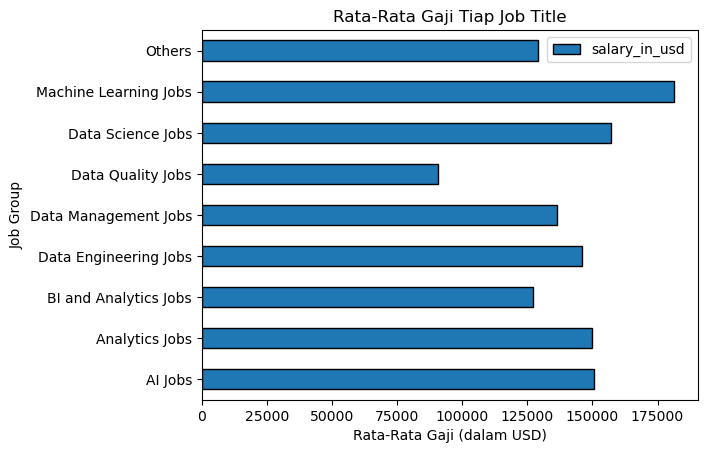

In [827]:
df.groupby('job_group').agg({'salary_in_usd':'mean'}).plot(kind = "barh", title = "Rata-Rata Gaji Tiap Job Title", xlabel = "Rata-Rata Gaji (dalam USD)", ylabel = "Job Group", edgecolor = "black")
plt.legend(title=None)
plt.show()

Bar chart ini menunjukkan rata-rata gaji (dalam USD) untuk tiap kelompok kerja. Kelompok kerja yang memiliki gaji rata-rata tertinggi adalah kelompok kerja "Machine Learning" yang melebihi 175000 USD

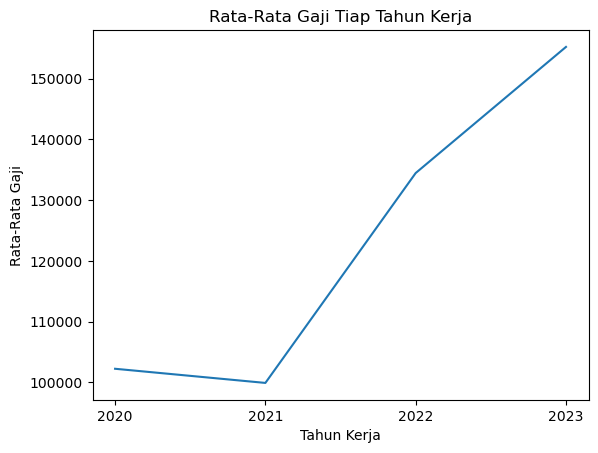

In [828]:
df.groupby('work_year')['salary_in_usd'].mean().plot(kind = "line", xticks = [2020,2021,2022,2023], xlabel = "Tahun Kerja", ylabel = "Rata-Rata Gaji", title = "Rata-Rata Gaji Tiap Tahun Kerja")
plt.show()

Line chart ini menunjukkan rata-rata gaji (dalam USD) tiap tahun. Rata-rata gaji paling tinggi adalah pada tahun 2023 dan rata-rata gaji paling rendah adalah pada tahun 2020. Dari grafik ini, kita dapat melihat bahwa hubungannya cenderung linear naik. Outliernya adalah pada 2021 dimana menurun namun setelah itu naik.

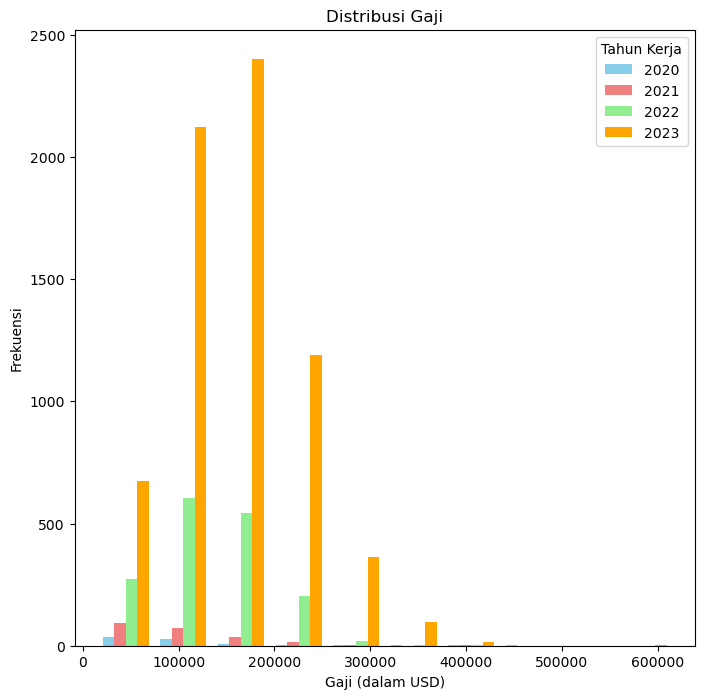

In [829]:
work_year_groups = [df[df['work_year'] == year]['salary_in_usd'].values for year in sorted(df['work_year'].unique())]
plt.figure(figsize=(8, 8))
plt.hist(work_year_groups, bins=10, label=sorted(df['work_year'].unique()), color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Distribusi Gaji')
plt.xlabel('Gaji (dalam USD)')
plt.ylabel('Frekuensi')
plt.legend(title='Tahun Kerja')
plt.show()

Chart ini menunjukkan distribusi gaji dari tahun ke tahun. Paling banyak orang menerima gaji sedikit di bawah 200000 USD pada tahun 2023

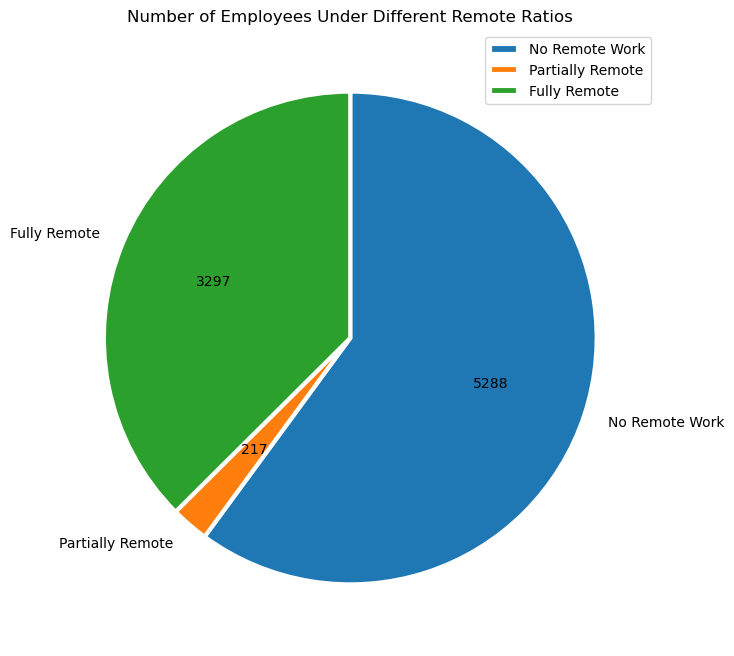

In [830]:
remote_ratio_counts = df.groupby("remote_ratio")["employee_residence"].size()
fig, ax = plt.subplots(figsize=(8, 8))
remote_ratio_counts.plot(kind="pie", autopct=lambda p: f'{int(p * len(df) / 100)}', startangle=90, labels=['No Remote Work', 'Partially Remote', 'Fully Remote'], counterclock=False, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, ax=ax)
plt.title("Number of Employees Under Different Remote Ratios")
plt.ylabel('')
plt.legend(labels=['No Remote Work', 'Partially Remote', 'Fully Remote'])
plt.show()

Bar chart ini menunjukkan jumlah pekerja yang bekerja remote, partially remote and tidak remote. Kebanyakan pekerja tidak bekerja secara remote sama sekali pada angka sekitar 5288 orang. Jika kita lihat dari data pekerja, kita dapat melihat bahwa kebanyakan pekerja ada di US. Jadi data ini juga mengimplikasikan bahwa pekerja yang bekerja di US tersebut mayoritas tidak melakukan remote work.

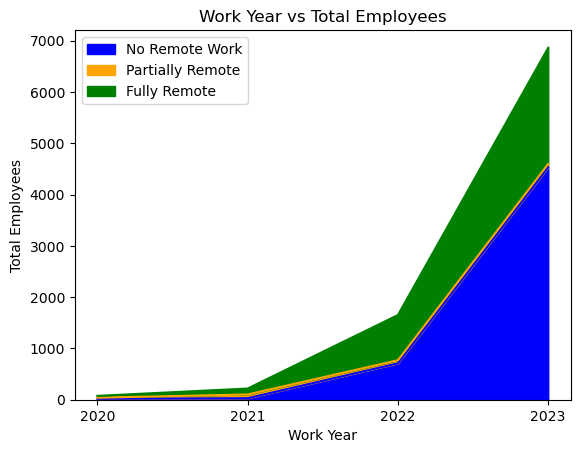

In [831]:
grouped_data = df.groupby(["work_year", "remote_ratio"]).size().unstack()
colors = ['blue', 'orange', 'green']
ax = grouped_data.plot(kind="area", stacked=True, xticks=[2020, 2021, 2022, 2023], title="Work Year vs Total Employees", xlabel="Work Year", ylabel="Total Employees", color=colors)
legend_labels = ["No Remote Work", "Partially Remote", "Fully Remote"]
legend_rectangles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_rectangles, legend_labels)
plt.show()

Area chart ini menunjukkan jumlah pekerja dari tahun ke tahun. Kita lihat jumlah pekerja meningkat drastis setelah tahun 2022 dan lebih lagi pada 2023. Ini masuk akal karena tahun 2020 dan 2021 dunia masih berada dalam pandemik dan perusahaan banyak melepas pekerja untuk menurunkan pengeluaran.

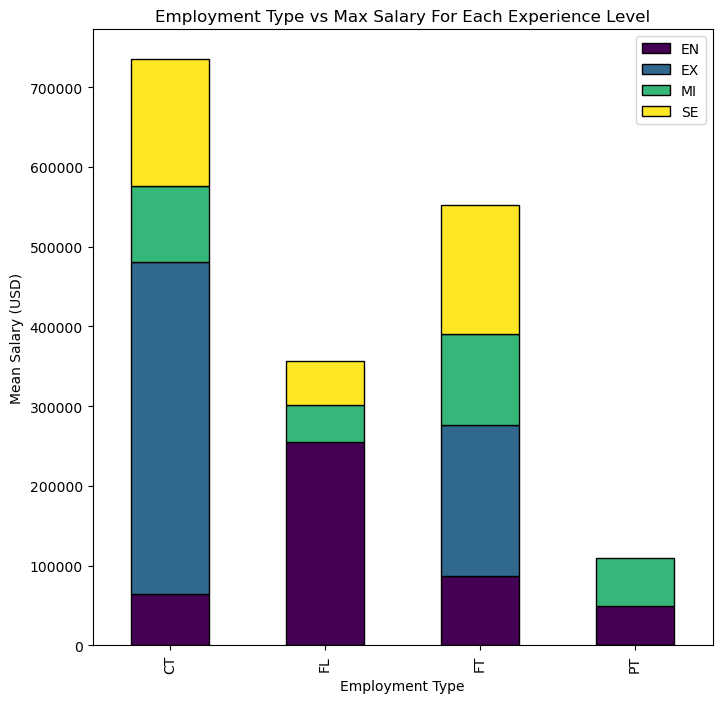

In [832]:
pivot_table = df.pivot_table(index='employment_type', columns='experience_level', values='salary_in_usd', aggfunc='mean')
ax = pivot_table.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black',figsize = (8,8))
ax.set(xlabel='Employment Type', ylabel='Mean Salary (USD)')
ax.set_title('Employment Type vs Max Salary For Each Experience Level')
ax.legend(title=None)
plt.show()

Stacked bar chart ini menunjukkan hubungan antara employment type, experience level, dan rata-rata gaji (dalam USD)

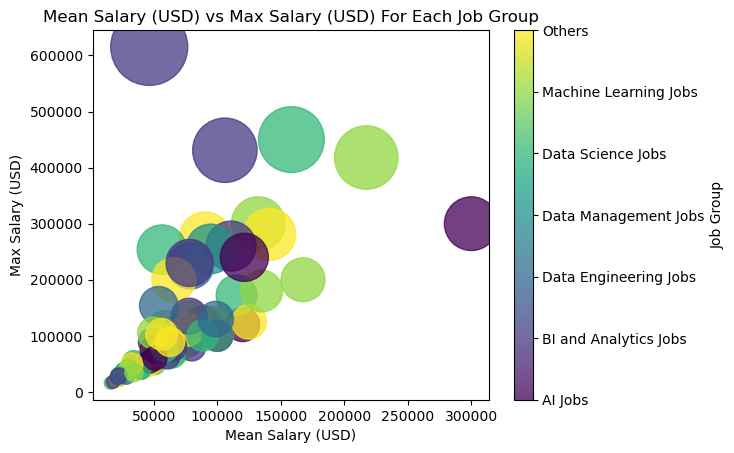

In [833]:
summary_stats = df.groupby('company_location').agg({'salary_in_usd': ['mean', 'max'], 'job_group': 'first'}).reset_index()
scatter = plt.scatter(summary_stats['salary_in_usd']['mean'], summary_stats['salary_in_usd']['max'], s=summary_stats['salary_in_usd']['max']*0.005, c=pd.Categorical(summary_stats['job_group']['first']).codes, cmap='viridis', alpha=0.75)
plt.title('Mean Salary (USD) vs Max Salary (USD) For Each Job Group')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Max Salary (USD)')
colorbar = plt.colorbar(scatter, ticks=range(len(pd.Categorical(summary_stats['job_group']['first']).categories)))
colorbar.set_label('Job Group')
colorbar.set_ticklabels(pd.Categorical(summary_stats['job_group']['first']).categories)
plt.show()

Scatter plot ini menunjukkan hubungan antara rata-rata gaji dan gaji maksimal untuk tiap pekerjaan. 

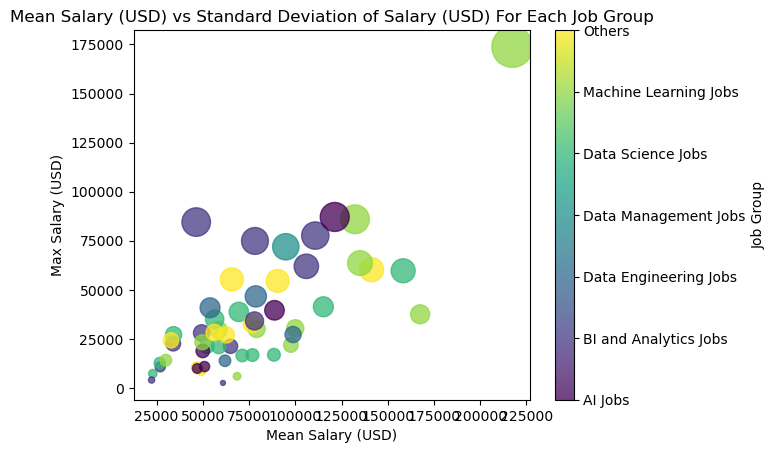

In [834]:
summary_stats = df.groupby('company_location').agg({'salary_in_usd': ['mean', 'std'], 'job_group': 'first'}).reset_index()
scatter = plt.scatter(summary_stats['salary_in_usd']['mean'], summary_stats['salary_in_usd']['std'], s=summary_stats['salary_in_usd']['std']*0.005, c=pd.Categorical(summary_stats['job_group']['first']).codes, cmap='viridis', alpha=0.75)
plt.title('Mean Salary (USD) vs Standard Deviation of Salary (USD) For Each Job Group')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Max Salary (USD)')
colorbar = plt.colorbar(scatter, ticks=range(len(pd.Categorical(summary_stats['job_group']['first']).categories)))
colorbar.set_label('Job Group')
colorbar.set_ticklabels(pd.Categorical(summary_stats['job_group']['first']).categories)
plt.show()

Scatter plot ini menunjukkan hubungan antara rata-rata gaji dan standar deviasi untuk tiap pekerjaan. 

In [835]:
df["salary"].corr(df["salary_in_usd"])

0.04984095666541911

Karena korelasi mendekati 0, artinya data "rating" dan data "useful_count" tidak berkolerasi.

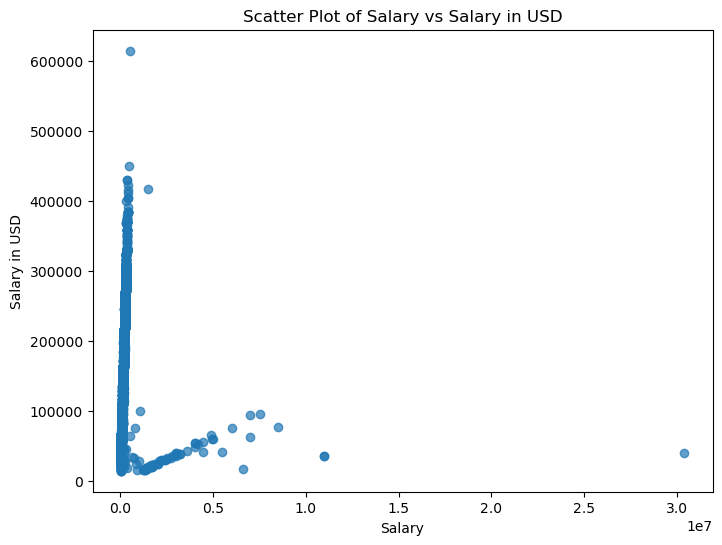

In [836]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salary'], df['salary_in_usd'], alpha=0.7)
plt.title('Scatter Plot of Salary vs Salary in USD')
plt.xlabel('Salary')
plt.ylabel('Salary in USD')
plt.show()

In [837]:
df["salary_in_usd"].corr(df["work_year"])

0.18605776233072488

Karena korelasi mendekati 0, artinya data "rating" dan data "useful_count" tidak berkolerasi.

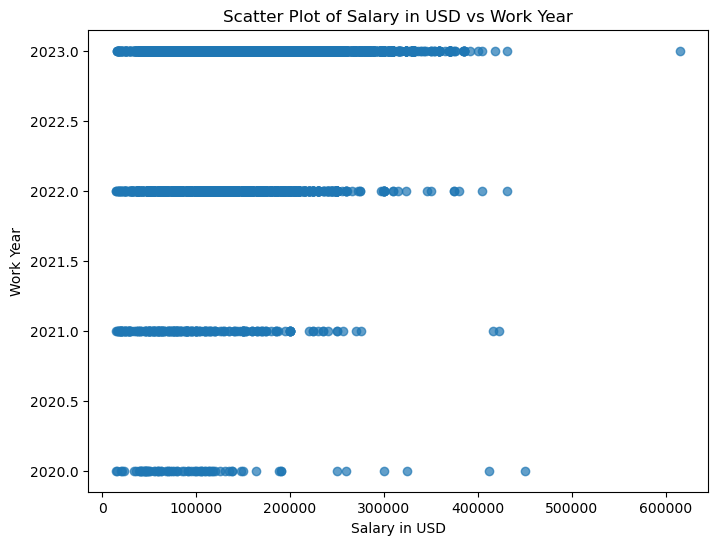

In [838]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salary_in_usd'], df['work_year'], alpha=0.7)
plt.title('Scatter Plot of Salary in USD vs Work Year')
plt.xlabel('Salary in USD')
plt.ylabel('Work Year')
plt.show()

In [839]:
df["salary"].corr(df["work_year"])

-0.09042687760159504

Karena korelasi mendekati 0, artinya data "rating" dan data "useful_count" tidak berkolerasi.

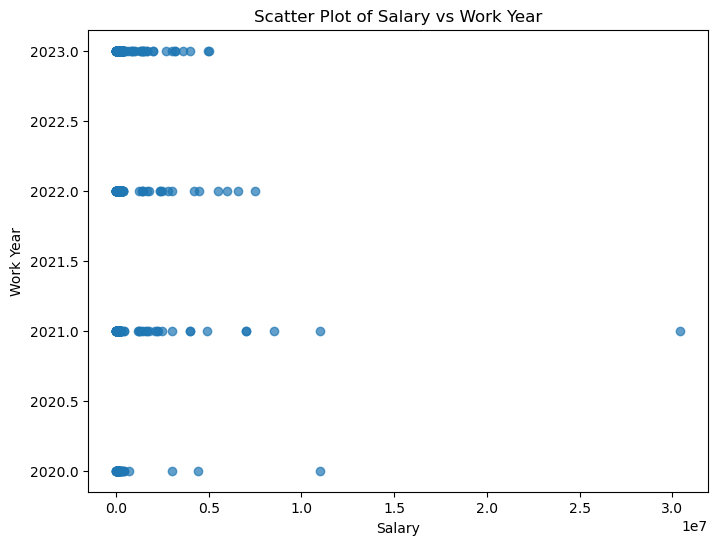

In [840]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salary'], df['work_year'], alpha=0.7)
plt.title('Scatter Plot of Salary vs Work Year')
plt.xlabel('Salary')
plt.ylabel('Work Year')
plt.show()